# Quantum walk on a line

This section is based on the paper [Quantum Walk on a Line with Two Entangled Particles](https://arxiv.org/pdf/quant-ph/0411065).

In [61]:
import numpy as np
import matplotlib.pyplot as plt


# Constants definition
H = 1/np.sqrt(2) * np.matrix([
    [1, 1],
    [1, -1]
])

SPIN_UP = np.array([1, 0])
SPIN_DOWN = np.array([0, 1])


def hadamard_coin_qw(system):
    """
    Quantum walk using an Hadamard coin operator
    """
    
    # Apply coin operator
    for position in range(-N, N+1):
        system[position] = H.dot(system[position])
    
    # Apply shift operator
    new_system = np.zeros((2*N+1, 2))
    for position in range(-N, N+1):
        new_system[position+1][0] += system[position][0]
        new_system[position-1][1] += system[position][1]
    
    return new_system


def balanced_coin_cw(system):
    """
    Classical walk using a balanced coin operator
    """
    
    # Apply coin and shift operator
    new_system = np.zeros((2*N+1, 1))
    for position in range(-N, N+1):
        new_system[position+1] += system[position] * 1/2
        new_system[position-1] += system[position] * 1/2
    
    return new_system

In [65]:
# Initial conditions

N = 100  # Number of steps
quantum_system, classical_system = np.zeros((2*N+1, 2)), np.zeros((2*N+1, 1))
quantum_system[0], classical_system[0] = SPIN_UP, 1

In [66]:
for t in range(N-1):
    quantum_system = hadamard_coin_qw(quantum_system)
    classical_system = balanced_coin_cw(classical_system)

quantum_probabilities = np.zeros(2*N+1)
classical_probabilities = balanced_coin_cw(classical_system)  # One more step to do N steps

for position in range(-N+1, N):
    quantum_probabilities[position] = abs(quantum_system[position-1][0])**2 + abs(quantum_system[position+1][1])**2

quantum_probabilities[-N] = abs(quantum_system[-N+1][1])**2
quantum_probabilities[N] = abs(quantum_system[N-1][0])**2

# Reorder the data
quantum_probabilities = np.concatenate([quantum_probabilities[-N:], quantum_probabilities[0:N+1]])
classical_probabilities = np.concatenate([classical_probabilities[-N:], classical_probabilities[0:N+1]])

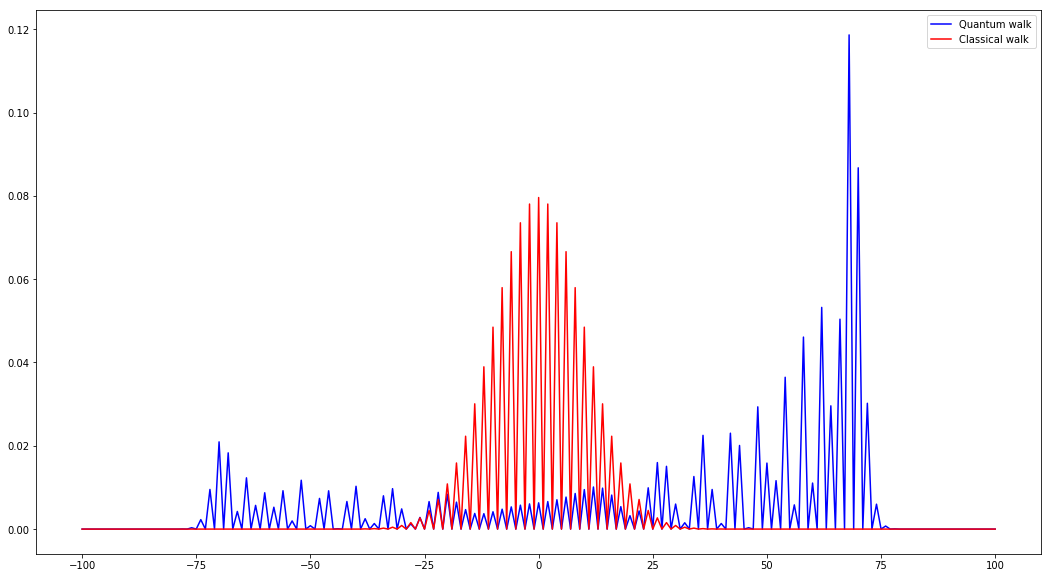

In [67]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(range(-N, N+1), quantum_probabilities, '-b', label='Quantum walk')
ax.plot(range(-N, N+1), classical_probabilities, '-r', label='Classical walk')
leg = ax.legend();

In [68]:
max(quantum_probabilities), max(classical_probabilities)

(0.11862522533565281, array([ 0.07958924]))